 # Drug-Prescription-Review
 The model provides a comprehensive analysis of a drug review dataset using Python libraries such as NumPy, Pandas, Matplotlib, Seaborn, and NLTK.It includes data loading, initial exploration, descriptive statistics, data cleaning, visualization, text processing, feature engineering, and interactive analysis. Additionally, it utilizes ipywidgets for interactive visualizations and advanced analysis to identify common conditions and the most useful drugs. The machine learning model employed for sentiment analysis, utilizing NLTK's VADER, assesses the sentiment of drug reviews to enhance understanding of user experiences and provide valuable insights for decision-making in healthcare.

# Importing Libraries

In [63]:
#all the import statmens and neccseary files are imported here
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ravim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ravim\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

- ### `Google Colab Connection`

In [64]:
# if you are using google colaboratory then you can mount your google drive to the notebook uncomment and use it
'''
from google.colab import drive
drive.mount('/content/drive/')

#path of the dataset is given here
path='/content/drive/MyDrive/Drug Dataset/drug.csv'
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive/')\n\n#path of the dataset is given here\npath='/content/drive/MyDrive/Drug Dataset/drug.csv'\n"

#### Visualization Aesthetics

In [65]:
# Set up visualization aesthetics
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-v0_8-darkgrid')


# Loading the Dataset

In [66]:
# Read the dataset into a pandas DataFrame
drug_data = pd.read_csv('../DataSet/drug.csv')
# Print dataset dimensions
print("Dataset Dimensions:", drug_data.shape)

Dataset Dimensions: (161297, 7)


In [67]:
# Display first few records
drug_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


 ### Exploring the data

In [68]:
# Count unique drugs and conditions
print("Unique Drugs in Dataset:", drug_data['drugName'].nunique())
print("Unique Conditions in Dataset:", drug_data['condition'].nunique())

# Time range of data collection
print("\nData Collection Period")
print("Start Date:", drug_data['date'].min())
print("End Date:", drug_data['date'].max())

Unique Drugs in Dataset: 3436
Unique Conditions in Dataset: 884

Data Collection Period
Start Date: 1-Apr-08
End Date: 9-Sep-17


### Summarizing the data

In [69]:

# Summarize numerical columns
drug_data[['rating', 'usefulCount']].describe()


# Summarize categorical data
drug_data[['drugName', 'condition', 'review']].describe(include='object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


### Analysing the data

In [70]:

# Analysis of drugs with zero useful counts
print("Analysis of Drugs with Zero Useful Counts")
print("------------------------------------------")
print("Count of Drugs with No Useful Count:", drug_data[drug_data['usefulCount'] == 0].count()[0])
print("Count of High Rated Drugs with No Useful Count:", drug_data[(drug_data['usefulCount'] == 0) & (drug_data['rating'] >= 8)].count()[0])
print("Average Rating of Drugs with No Useful Count: {:.2f}".format(drug_data[drug_data['usefulCount'] == 0]['rating'].mean()))

# Analysis of highly useful drugs
print("\nAnalysis of Highly Useful Drugs")
print("--------------------------------")
print("Count of Drugs with More Than 1000 Useful Counts:", drug_data[drug_data['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts:", drug_data[drug_data['usefulCount'] > 1000]['rating'].mean())
print("\nDrugs and Conditions with 1000+ Useful Counts:\n", drug_data[drug_data['usefulCount'] > 1000][['drugName', 'condition']].reset_index(drop=True))

Analysis of Drugs with Zero Useful Counts
------------------------------------------
Count of Drugs with No Useful Count: 6318
Count of High Rated Drugs with No Useful Count: 2633
Average Rating of Drugs with No Useful Count: 5.80

Analysis of Highly Useful Drugs
--------------------------------
Count of Drugs with More Than 1000 Useful Counts: 4
Average Rating of Drugs with 1000+ Useful Counts: 10.0

Drugs and Conditions with 1000+ Useful Counts:
          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\1497724188.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Count of Drugs with No Useful Count:", drug_data[drug_data['usefulCount'] == 0].count()[0])
C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\1497724188.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Count of High Rated Drugs with No Useful Count:", drug_data[(drug_data['usefulCount'] == 0) & (drug_data['rating'] >= 8)].count()[0])
C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\1497724188.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versi

# Preprocessing

### `Missing Values`

In [71]:

# Check for missing values
print("Missing Values:\n", drug_data.isnull().sum())

# Drop rows with missing 'condition'
drug_data_cleaned = drug_data.dropna()
print("Remaining Missing Values:", drug_data_cleaned.isnull().sum().sum())

Missing Values:
 uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64
Remaining Missing Values: 0


### `Hidden Patterns`

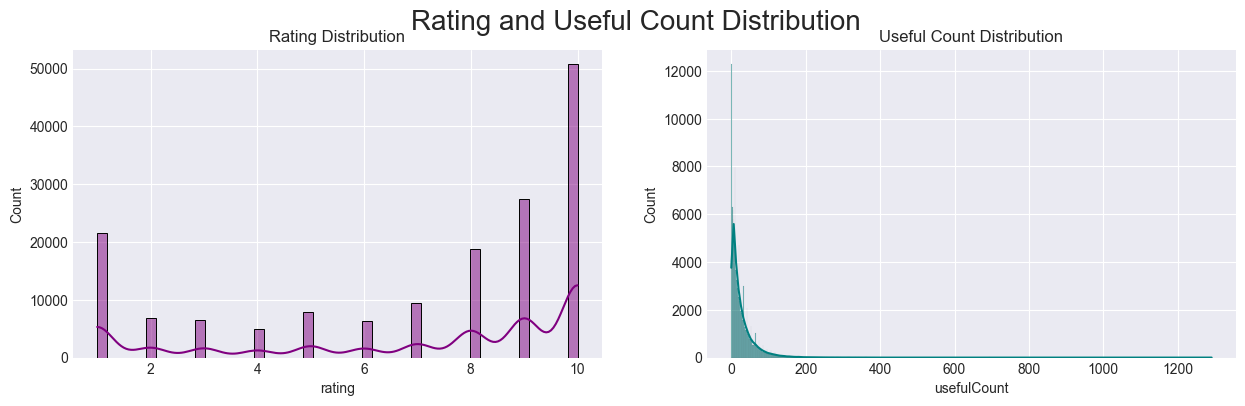

In [72]:

# Plot distribution of rating and useful counts
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.histplot(drug_data_cleaned['rating'], kde=True, color='purple')
plt.title('Rating Distribution')

plt.subplot(1, 2, 2)
sns.histplot(drug_data_cleaned['usefulCount'], kde=True, color='teal')
plt.title('Useful Count Distribution')

plt.suptitle('Rating and Useful Count Distribution', fontsize=20)
plt.show()


C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\4257135920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_data_cleaned['rating'], y=drug_data_cleaned['usefulCount'], palette='viridis')


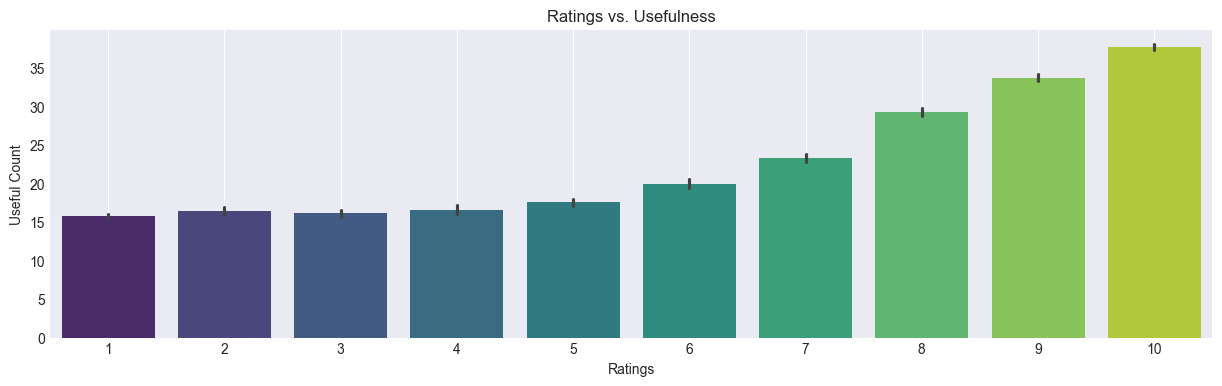

In [73]:
# Plot relationship between ratings and usefulness
plt.figure(figsize=(15, 4))
sns.barplot(x=drug_data_cleaned['rating'], y=drug_data_cleaned['usefulCount'], palette='viridis')
plt.xlabel('Ratings')
plt.ylabel('Useful Count')
plt.title('Ratings vs. Usefulness')
plt.grid()
plt.show()


### `Impact of Reviews`

In [74]:
# Add a column for review length
drug_data_cleaned['review_length'] = drug_data_cleaned['review'].apply(len)
drug_data_cleaned[['rating', 'review_length']].groupby('rating').agg(['min', 'mean', 'max'])

# Longest review
print("Longest Review Length:", drug_data_cleaned['review_length'].max())
print(drug_data_cleaned['review'][drug_data_cleaned['review_length'] == drug_data_cleaned['review_length'].max()].iloc[0])

Longest Review Length: 10787
"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.
It did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.
Having now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. 
Before trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.
Now, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my c

C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\2680154400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data_cleaned['review_length'] = drug_data_cleaned['review'].apply(len)


### `Cleaning Reviews`

In [75]:
# Remove punctuation from reviews
def clean_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

drug_data_cleaned['review'] = drug_data_cleaned['review'].apply(clean_punctuation)


C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\323731109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data_cleaned['review'] = drug_data_cleaned['review'].apply(clean_punctuation)


In [76]:

custom_stopwords = set(stopwords.words('english')).union({"i'm"})

def clean_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([word.lower() for word in tokens if word.lower() not in custom_stopwords])

drug_data_cleaned['review'] = drug_data_cleaned['review'].apply(clean_stopwords)

# Remove numbers from reviews
def clean_numbers(text):
    return ' '.join([word for word in text.split() if not re.search(r'\d', word)])

drug_data_cleaned['review'] = drug_data_cleaned['review'].apply(clean_numbers)


C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\3753182255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data_cleaned['review'] = drug_data_cleaned['review'].apply(clean_stopwords)
C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\3753182255.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data_cleaned['review'] = drug_data_cleaned['review'].apply(clean_numbers)


# Sentiment Analysis

### `From Reviews`

In [77]:
# Calculate sentiment scores
sid = SentimentIntensityAnalyzer()
drug_data_cleaned['sentiment'] = drug_data_cleaned['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Drop unnecessary columns
drug_data_cleaned = drug_data_cleaned.drop(['date', 'uniqueID', 'review', 'review_length', 'sentiment'], axis=1)



C:\Users\ravim\AppData\Local\Temp\ipykernel_2676\652855598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_data_cleaned['sentiment'] = drug_data_cleaned['review'].apply(lambda x: sid.polarity_scores(x)['compound'])


## Scores Calculation

### `Effective Score`

In [78]:
# Scale ratings to create an effective score
min_rating = drug_data_cleaned['rating'].min()
max_rating = drug_data_cleaned['rating'].max()

def calculate_effective_score(rating):
    scaled_rating = (rating - min_rating) / (max_rating - min_rating) * 5
    return 0 if scaled_rating <= 2 else 1

drug_data_cleaned['effective_score'] = drug_data_cleaned['rating'].apply(calculate_effective_score)

###  `Usefulness Score`

In [79]:
# Calculate usefulness score
drug_data_cleaned['usefulness_score'] = drug_data_cleaned['rating'] * drug_data_cleaned['usefulCount'] * drug_data_cleaned['effective_score']

# Top 10 most useful drugs
top_useful_drugs = drug_data_cleaned[drug_data_cleaned['usefulness_score'] > drug_data_cleaned['usefulness_score'].mean()]
top_useful_drugs = top_useful_drugs.sort_values(by='usefulness_score', ascending=False).head(10).reset_index(drop=True)
print(top_useful_drugs)

         drugName      condition  rating  usefulCount  effective_score  \
0          Zoloft     Depression      10         1291                1   
1      Sertraline     Depression      10         1291                1   
2          Mirena  Birth Control      10         1247                1   
3  Levonorgestrel  Birth Control      10         1247                1   
4          Zoloft     Depression       9          949                1   
5     Phentermine    Weight Loss      10          796                1   
6        Adipex-P    Weight Loss      10          796                1   
7        Implanon  Birth Control      10          730                1   
8         Viibryd     Depression      10          693                1   
9      Vilazodone     Depression      10          693                1   

   usefulness_score  
0             12910  
1             12910  
2             12470  
3             12470  
4              8541  
5              7960  
6              7960  
7        

# Widgets

## Check Effective Score

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

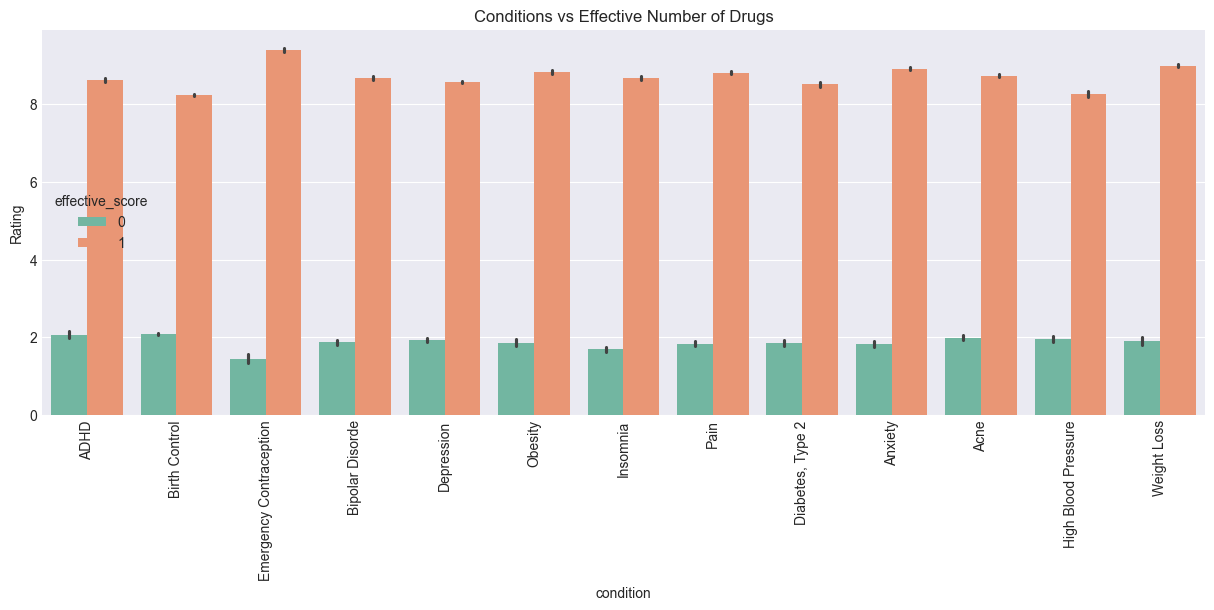

In [80]:

# Interactive widget to check effective score counts by condition
@interact
def check_effective_scores(condition=list(drug_data_cleaned['condition'].value_counts().index)):
    return drug_data_cleaned[drug_data_cleaned['condition'] == condition]['effective_score'].value_counts()

# Visualize conditions vs effective number of drugs
popular_conditions = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure', 'Migrane']
conditions_filtered = drug_data_cleaned[drug_data_cleaned['condition'].isin(popular_conditions)]

plt.figure(figsize=(15, 5))
sns.barplot(x=conditions_filtered['condition'], y=conditions_filtered['rating'], hue=conditions_filtered['effective_score'], palette='Set2')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.show()

In [81]:
# Most common conditions
print("Most Common Conditions:")
print(drug_data_cleaned['condition'].value_counts().head(10))

# Drugs with highest usefulness counts
top_useful_counts = drug_data_cleaned[drug_data_cleaned['usefulCount'] > drug_data_cleaned['usefulCount'].mean()]
top_useful_counts = top_useful_counts.sort_values(by='usefulCount', ascending=False).head(10).reset_index(drop=True)
print(top_useful_counts)

Most Common Conditions:
condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: count, dtype: int64
         drugName      condition  rating  usefulCount  effective_score  \
0          Zoloft     Depression      10         1291                1   
1      Sertraline     Depression      10         1291                1   
2  Levonorgestrel  Birth Control      10         1247                1   
3          Mirena  Birth Control      10         1247                1   
4          Zoloft     Depression       9          949                1   
5        Adipex-P    Weight Loss      10          796                1   
6     Phentermine    Weight Loss      10          796                1   
7          Celexa     Depression       8          771                1   
8      Citalopram     De

In [82]:
drug_data_cleaned = drug_data_cleaned.drop_duplicates()

## Drug Rates for Each Condition


In [83]:
# Remove duplicates

# Highest and lowest rated drugs for each condition
@interact
def rate_drugs_by_condition(condition=list(drug_data_cleaned['condition'].value_counts().index)):
    condition_data = drug_data_cleaned[drug_data_cleaned['condition'] == condition]
    print("\n Top 5 Drugs")
    print(condition_data[['drugName', 'usefulness_score']].sort_values(by='usefulness_score', ascending=False).head().reset_index(drop=True))
    print("\n\n Bottom 5 Drugs")
    print(condition_data[['drugName', 'usefulness_score']].sort_values(by='usefulness_score', ascending=True).head().reset_index(drop=True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

## Pickle Conversion

In [84]:
import pickle

# Save to a pickle file in Google Drive folder (Google Colab Usage)
#pick_insert = open('/content/drive/MyDrive/Drug Dataset/data.pickle','wb')
#pickle.dump(drug_data_cleaned,pick_insert)


# Save cleaned data to a pickle file in local folder
with open('data.pkl', 'wb') as f:
    pickle.dump(drug_data_cleaned, f)